In [ ]:
# imports of libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#!pip install geopandas
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
leases_data = pd.read_csv("/content/drive/Shareddrives/DataFest 2025/2. Data/Leases.csv")
market_occupancy_data = pd.read_csv("/content/drive/Shareddrives/DataFest 2025/2. Data/Major Market Occupancy Data.csv")
price_avail_data = pd.read_csv("/content/drive/Shareddrives/DataFest 2025/2. Data/Price and Availability Data.csv")
unemployment_data = pd.read_csv("/content/drive/Shareddrives/DataFest 2025/2. Data/Unemployment.csv")

# make sure data loaded fine
# Check basic structure
# leases_data.info()  # Data types, missing values

Where to Look

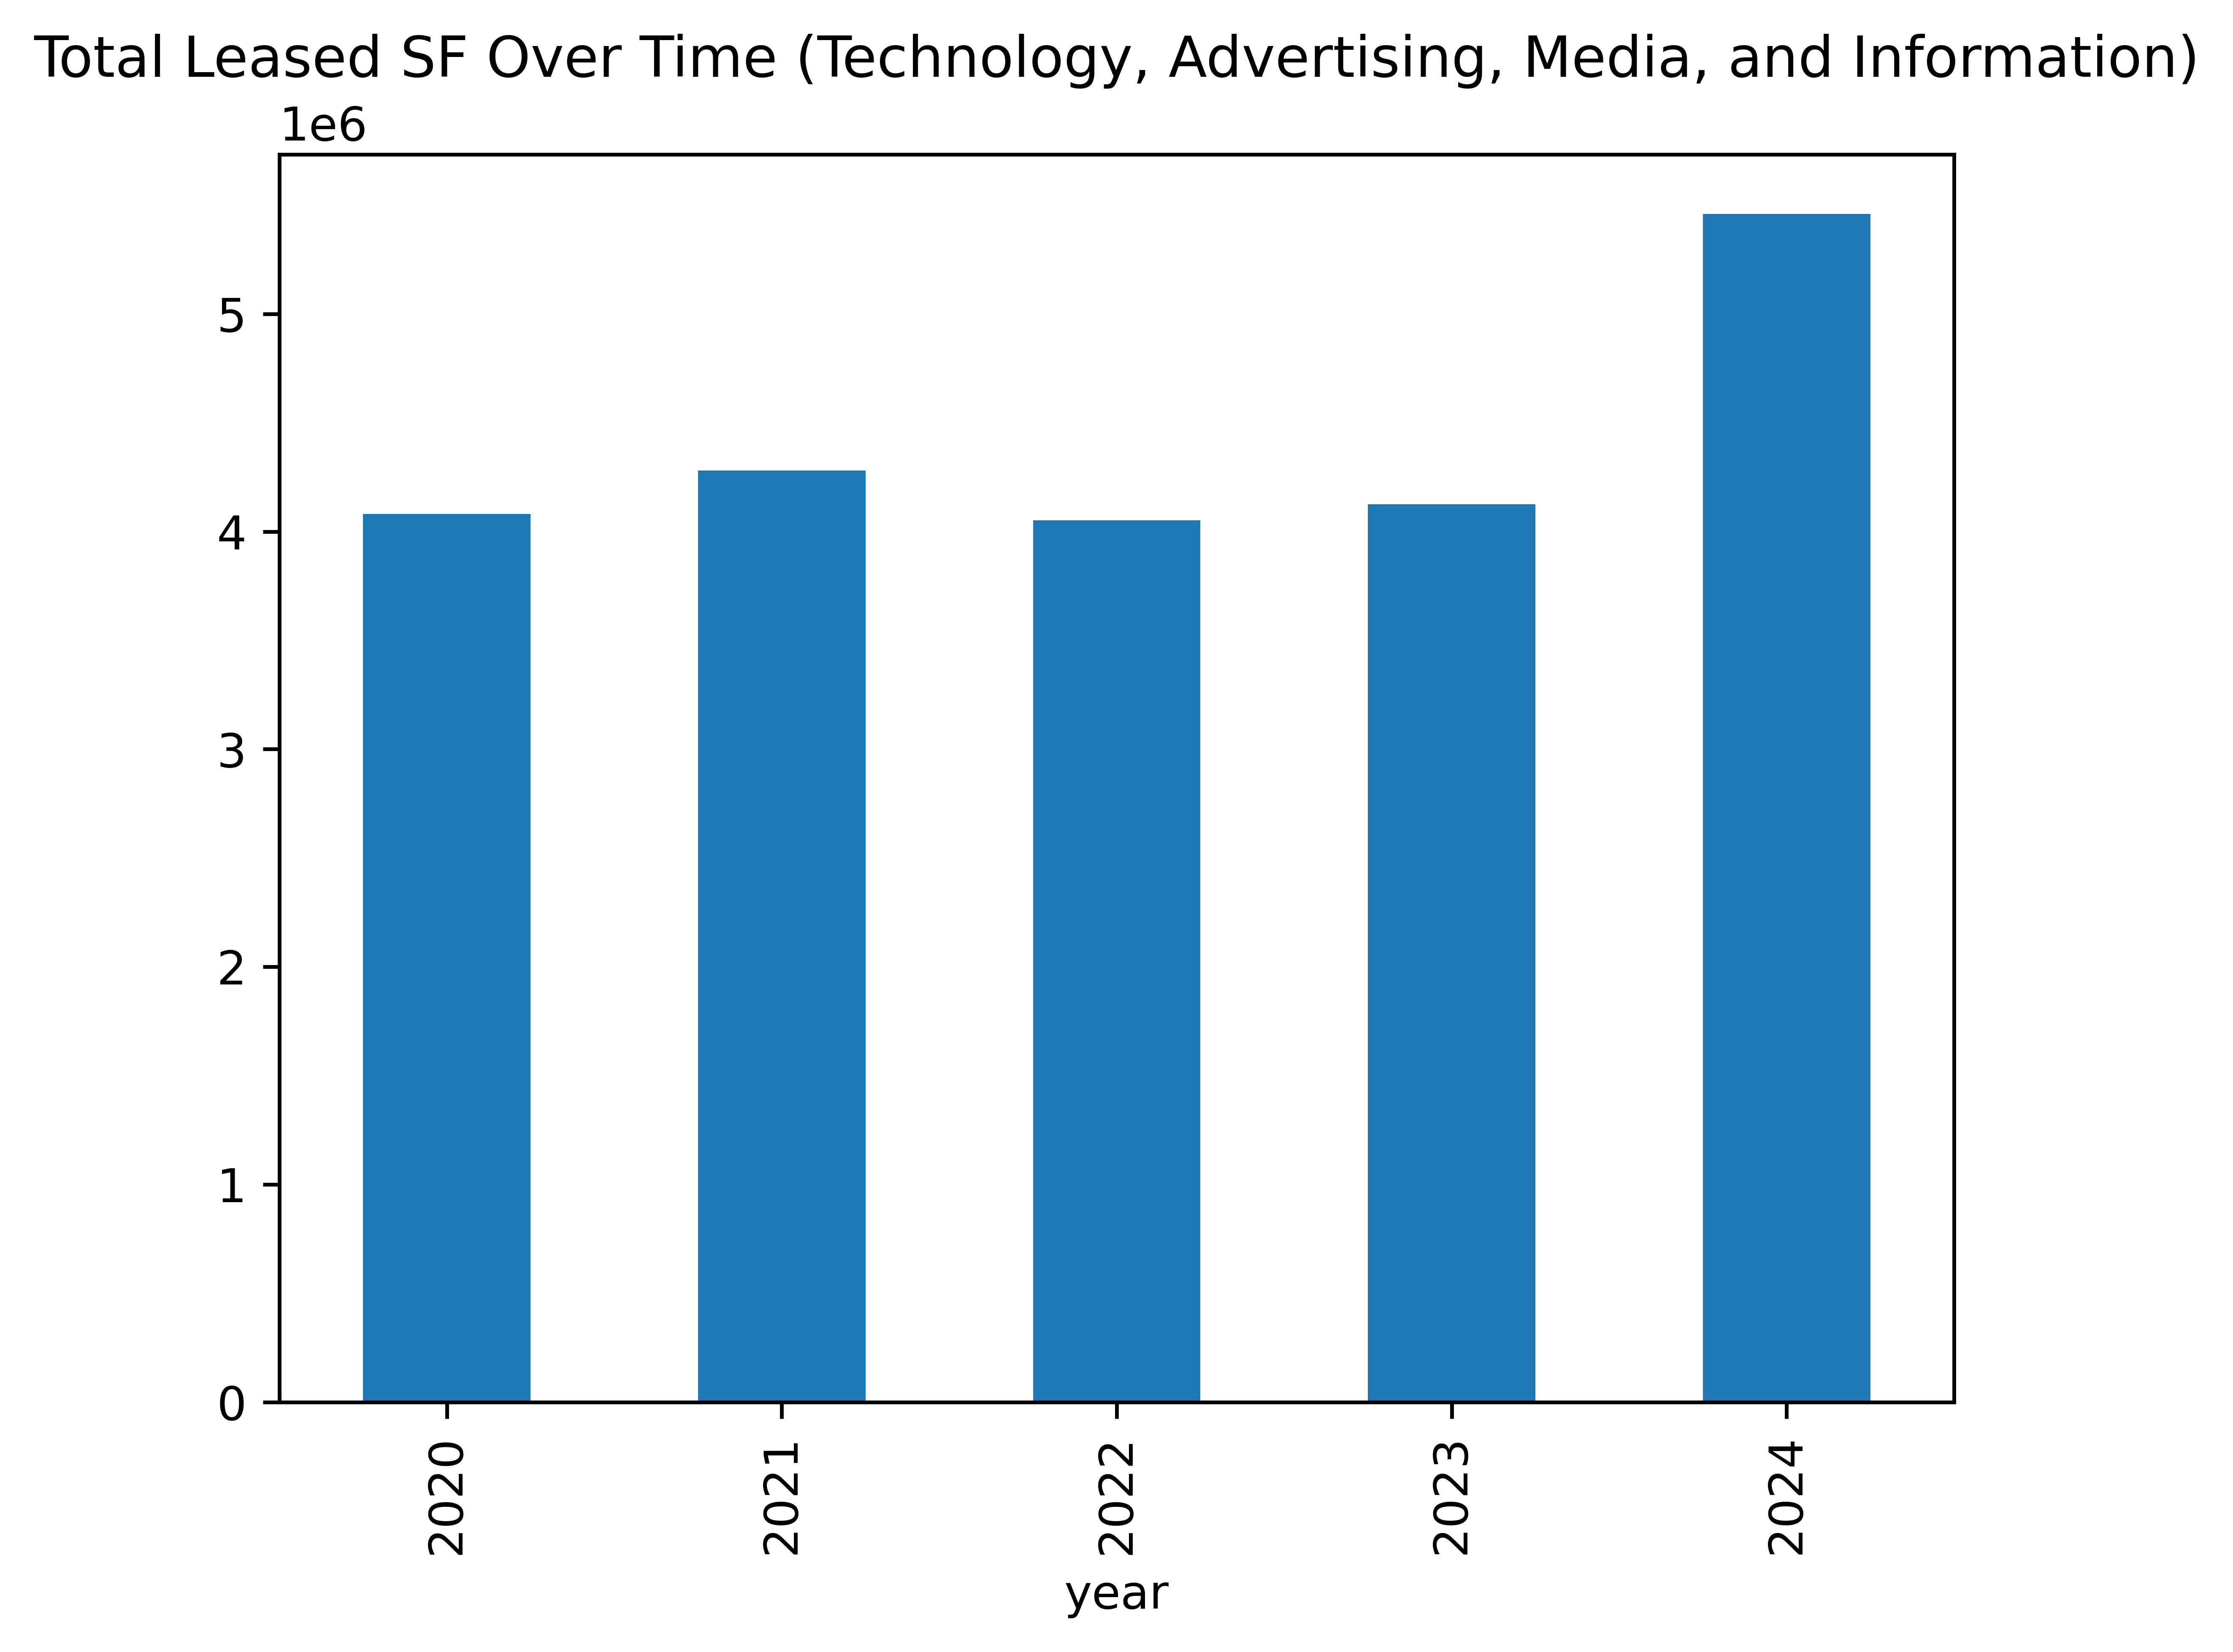

In [ ]:
# Leases over time
man_data = leases_data[leases_data['market']=='Manhattan']
man_data = man_data[man_data['internal_industry']=='Technology, Advertising, Media, and Information']
man_data = man_data[man_data['year'].isin([2020, 2021, 2022, 2023, 2024])]
leases_per_year = man_data.groupby("year")["leasedSF"].sum()

plt.rcParams['figure.dpi'] = 800
leases_per_year.plot(kind="bar", title="Total Leased SF Over Time (Technology, Advertising, Media, and Information)")
plt.show()


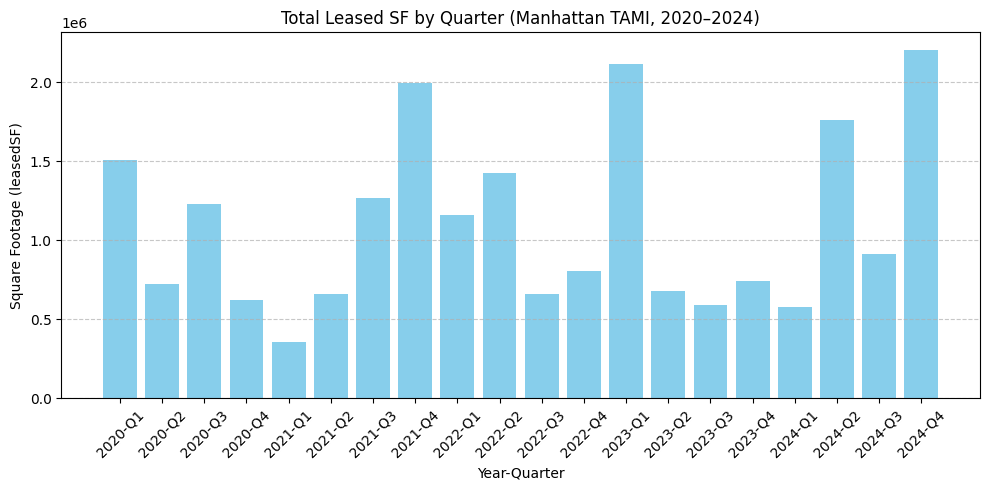

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Manhattan, TAMI, and years since 2020
man_data = leases_data[leases_data['market'] == 'Manhattan']
man_data = man_data[man_data['internal_industry'] == 'Technology, Advertising, Media, and Information']
man_data = man_data[man_data['year'].between(2020, 2024)]

# Combine year and quarter into a single label, e.g. "2020-Q1"
# The CSV has quarter values like "Q1", "Q2", etc.
man_data["year_quarter"] = man_data["year"].astype(str) + "-" + man_data["quarter"].astype(str)

# Group by year_quarter, summing up the leased square footage
leases_per_year_quarter = (
    man_data.groupby("year_quarter")["leasedSF"].sum().reset_index()
)

# Sort in chronological order
def parse_year_q(value):
    # Expected format: "2021-Q3"
    year_str, q_str = value.split("-Q")
    return (int(year_str), int(q_str))

leases_per_year_quarter["sort_key"] = leases_per_year_quarter["year_quarter"].apply(parse_year_q)
leases_per_year_quarter.sort_values("sort_key", inplace=True)
leases_per_year_quarter.drop(columns="sort_key", inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(
    leases_per_year_quarter["year_quarter"],
    leases_per_year_quarter["leasedSF"],
    color='skyblue'
)

plt.title("Total Leased SF by Quarter (Manhattan TAMI, 2020–2024)")
plt.xlabel("Year-Quarter")
plt.ylabel("Square Footage (leasedSF)")

# Rotate x labels for clarity
plt.xticks(rotation=45)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


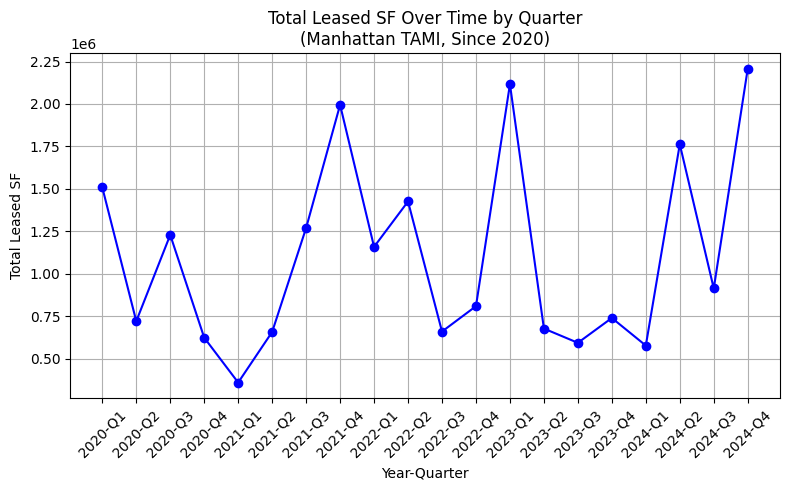

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: loading your leases data (adjust path as needed):
# leases_data = pd.read_csv("/content/drive/Shareddrives/DataFest 2025/2. Data/Leases.csv")

# 1) Filter for Manhattan TAMI leases from 2020 onward
man_data = leases_data[leases_data['market'] == 'Manhattan']
man_data = man_data[man_data['internal_industry'] == 'Technology, Advertising, Media, and Information']
man_data = man_data[man_data['year'] >= 2020]

# 2) Construct a combined Year-Quarter label. For example, '2020-Q1'.
#    The CSV has quarter as 'Q1', 'Q2', 'Q3', 'Q4'.
#    So we'll do: year_quarter = '2020-Q1' etc.
man_data["year_quarter"] = man_data["year"].astype(str) + "-" + man_data["quarter"].astype(str)

# 3) Group by this new label and sum leasedSF
leases_per_quarter = man_data.groupby("year_quarter")["leasedSF"].sum().reset_index()

# 4) Sort so the line goes in chronological order.
#    Because quarter is 'Q1', 'Q2', we can parse the 'year_quarter' string properly:
def parse_year_q(value):
    """
    Expects a string like '2020-Q1'.
    Splits on '-Q' -> ['2020', '1'] => convert to (2020, 1) for sorting.
    """
    year_str, q_str = value.split("-Q")
    return (int(year_str), int(q_str))

leases_per_quarter["sort_key"] = leases_per_quarter["year_quarter"].apply(parse_year_q)
leases_per_quarter.sort_values("sort_key", inplace=True)

# 5) Plot a line graph
plt.figure(figsize=(8,5), dpi=100)
plt.plot(
    leases_per_quarter["year_quarter"],
    leases_per_quarter["leasedSF"],
    marker='o',
    linestyle='-',
    color='blue'
)

plt.title("Total Leased SF Over Time by Quarter\n(Manhattan TAMI, Since 2020)")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Leased SF")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


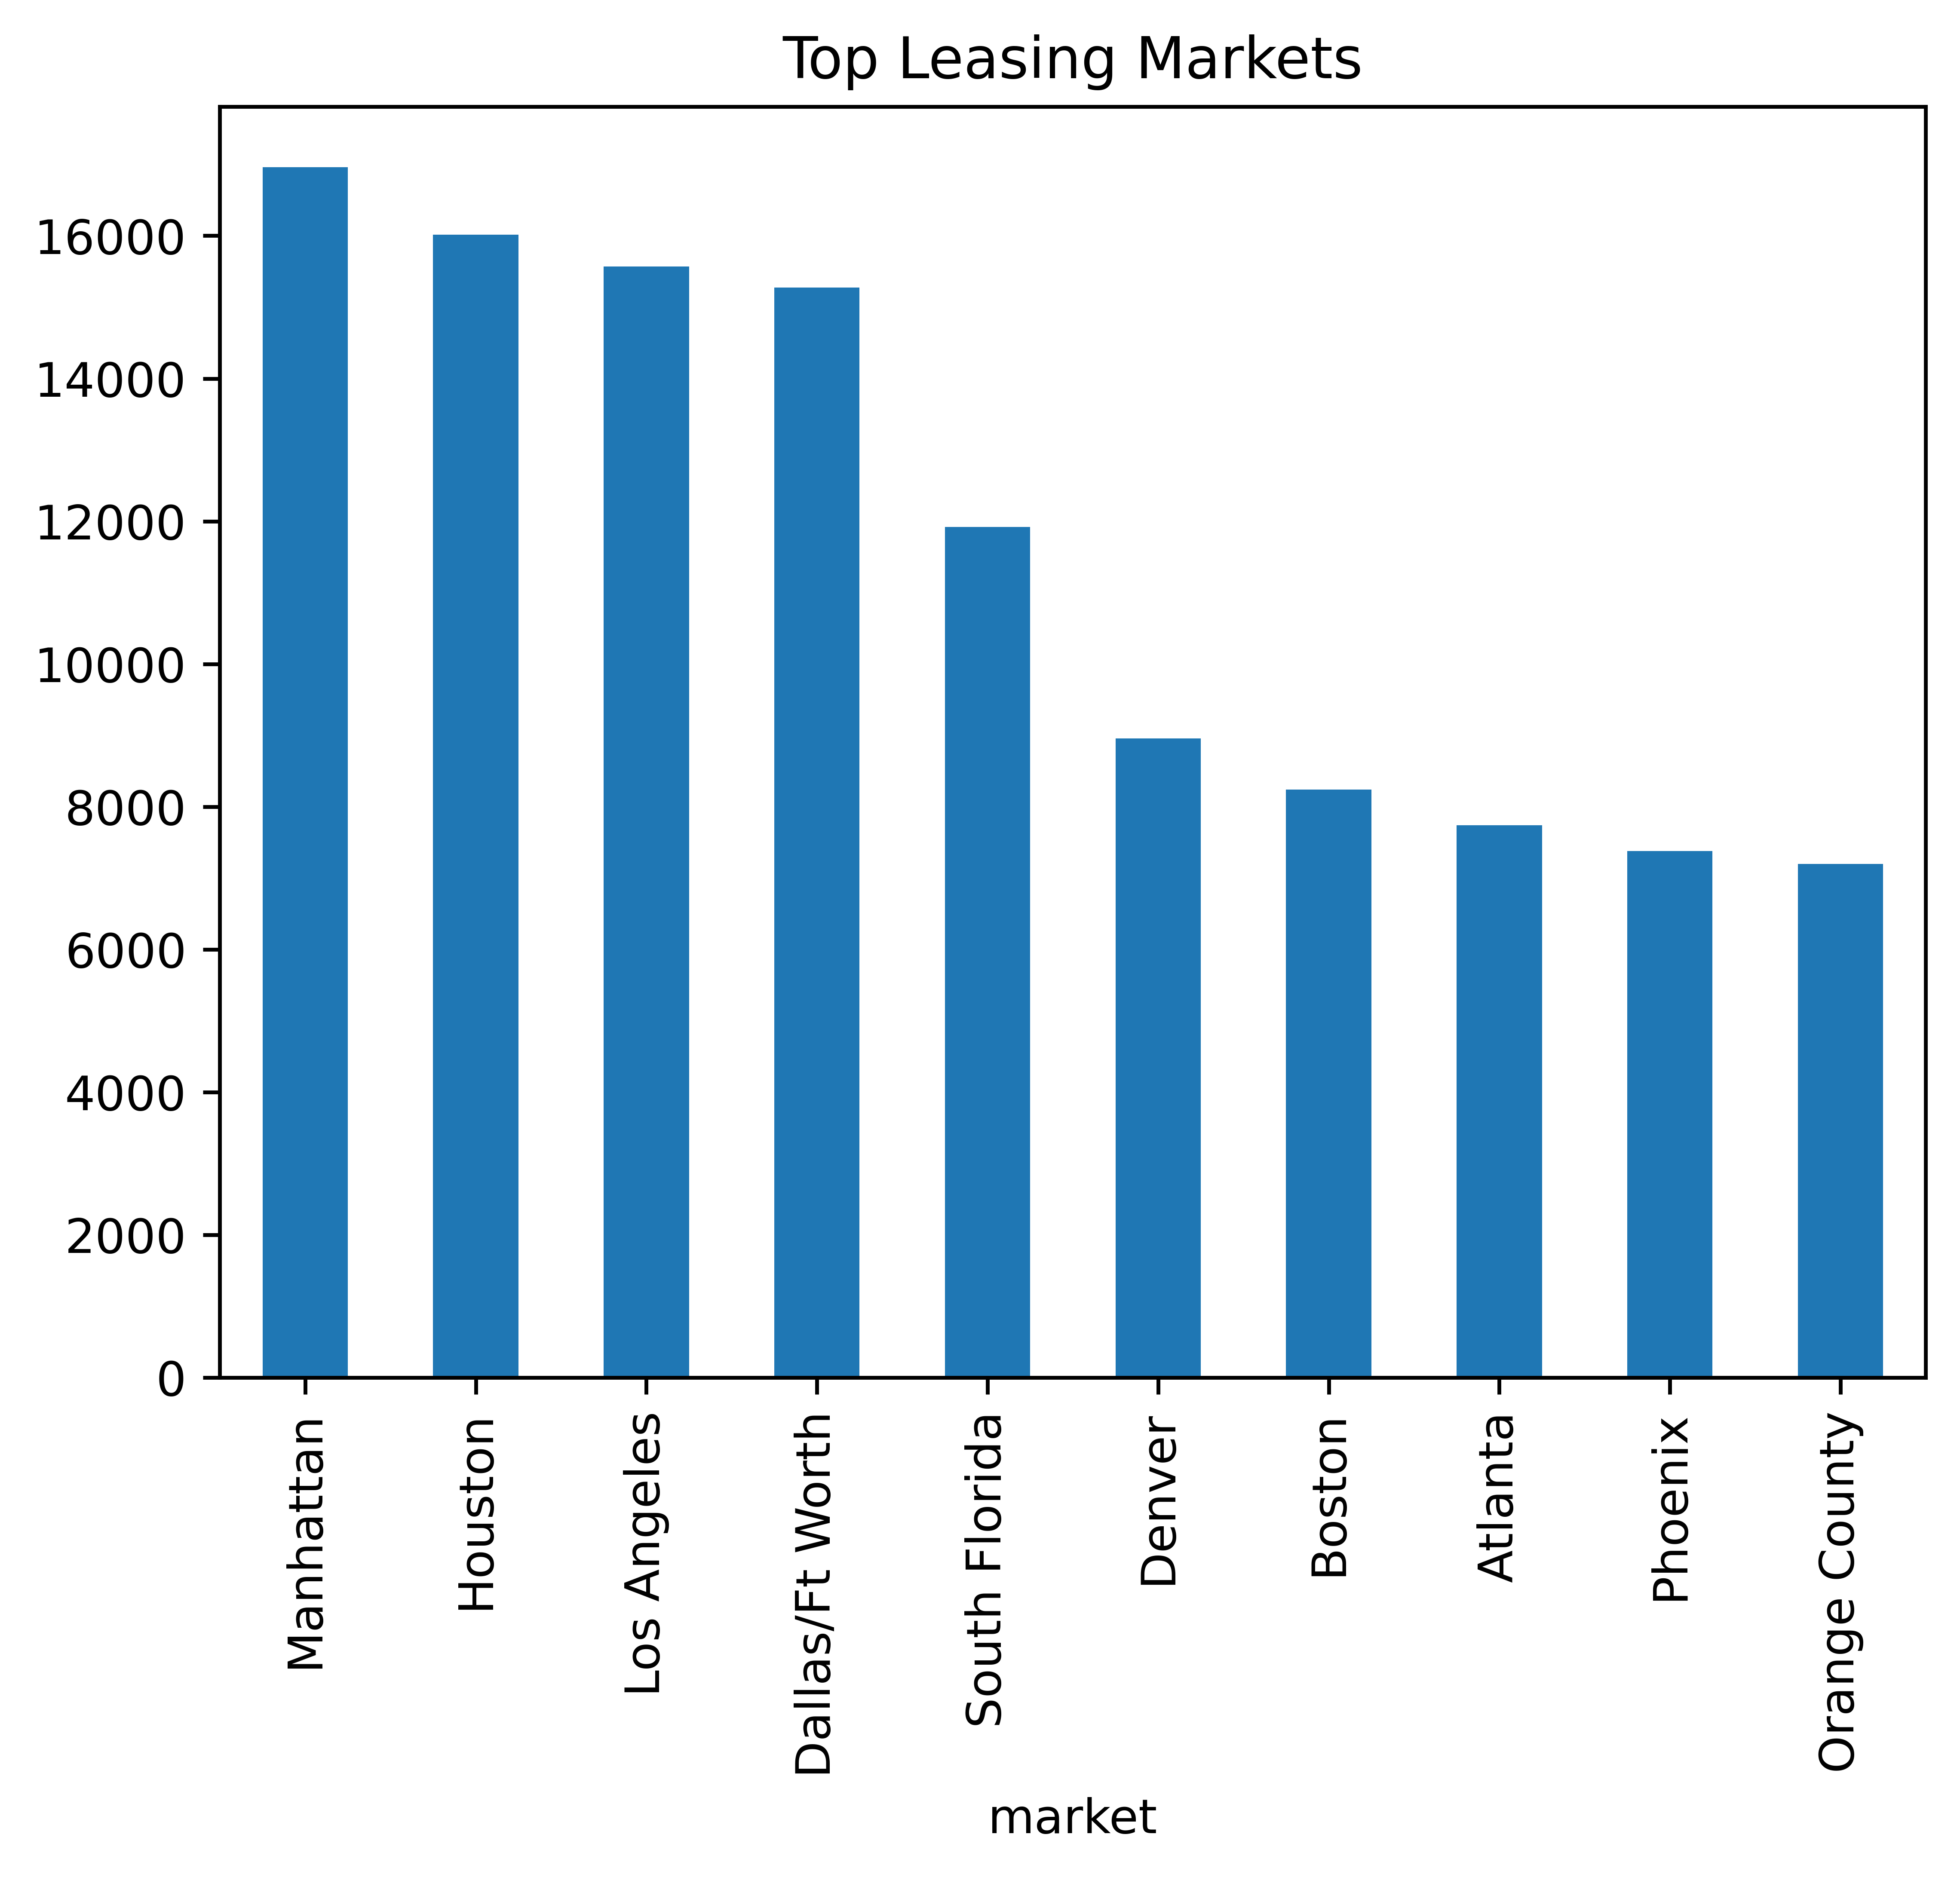

In [ ]:
# Top leasing Markets
leases_per_market = leases_data["market"].value_counts().head(10)

plt.rcParams['figure.dpi'] = 800
leases_per_market.plot(kind="bar", title="Top Leasing Markets")
plt.show()


<Axes: title={'center': 'Office Occupancy Trends Over Time'}, xlabel='year'>

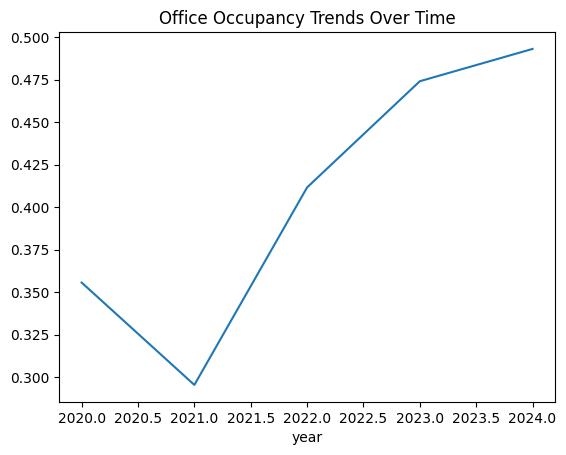

In [ ]:
# Occupancy trends over time
occupancy_trends = market_occupancy_data.groupby("year")["avg_occupancy_proportion"].mean()


occupancy_trends.plot(kind="line", title="Office Occupancy Trends Over Time")


Office spaces have been occupied more after the pandemic


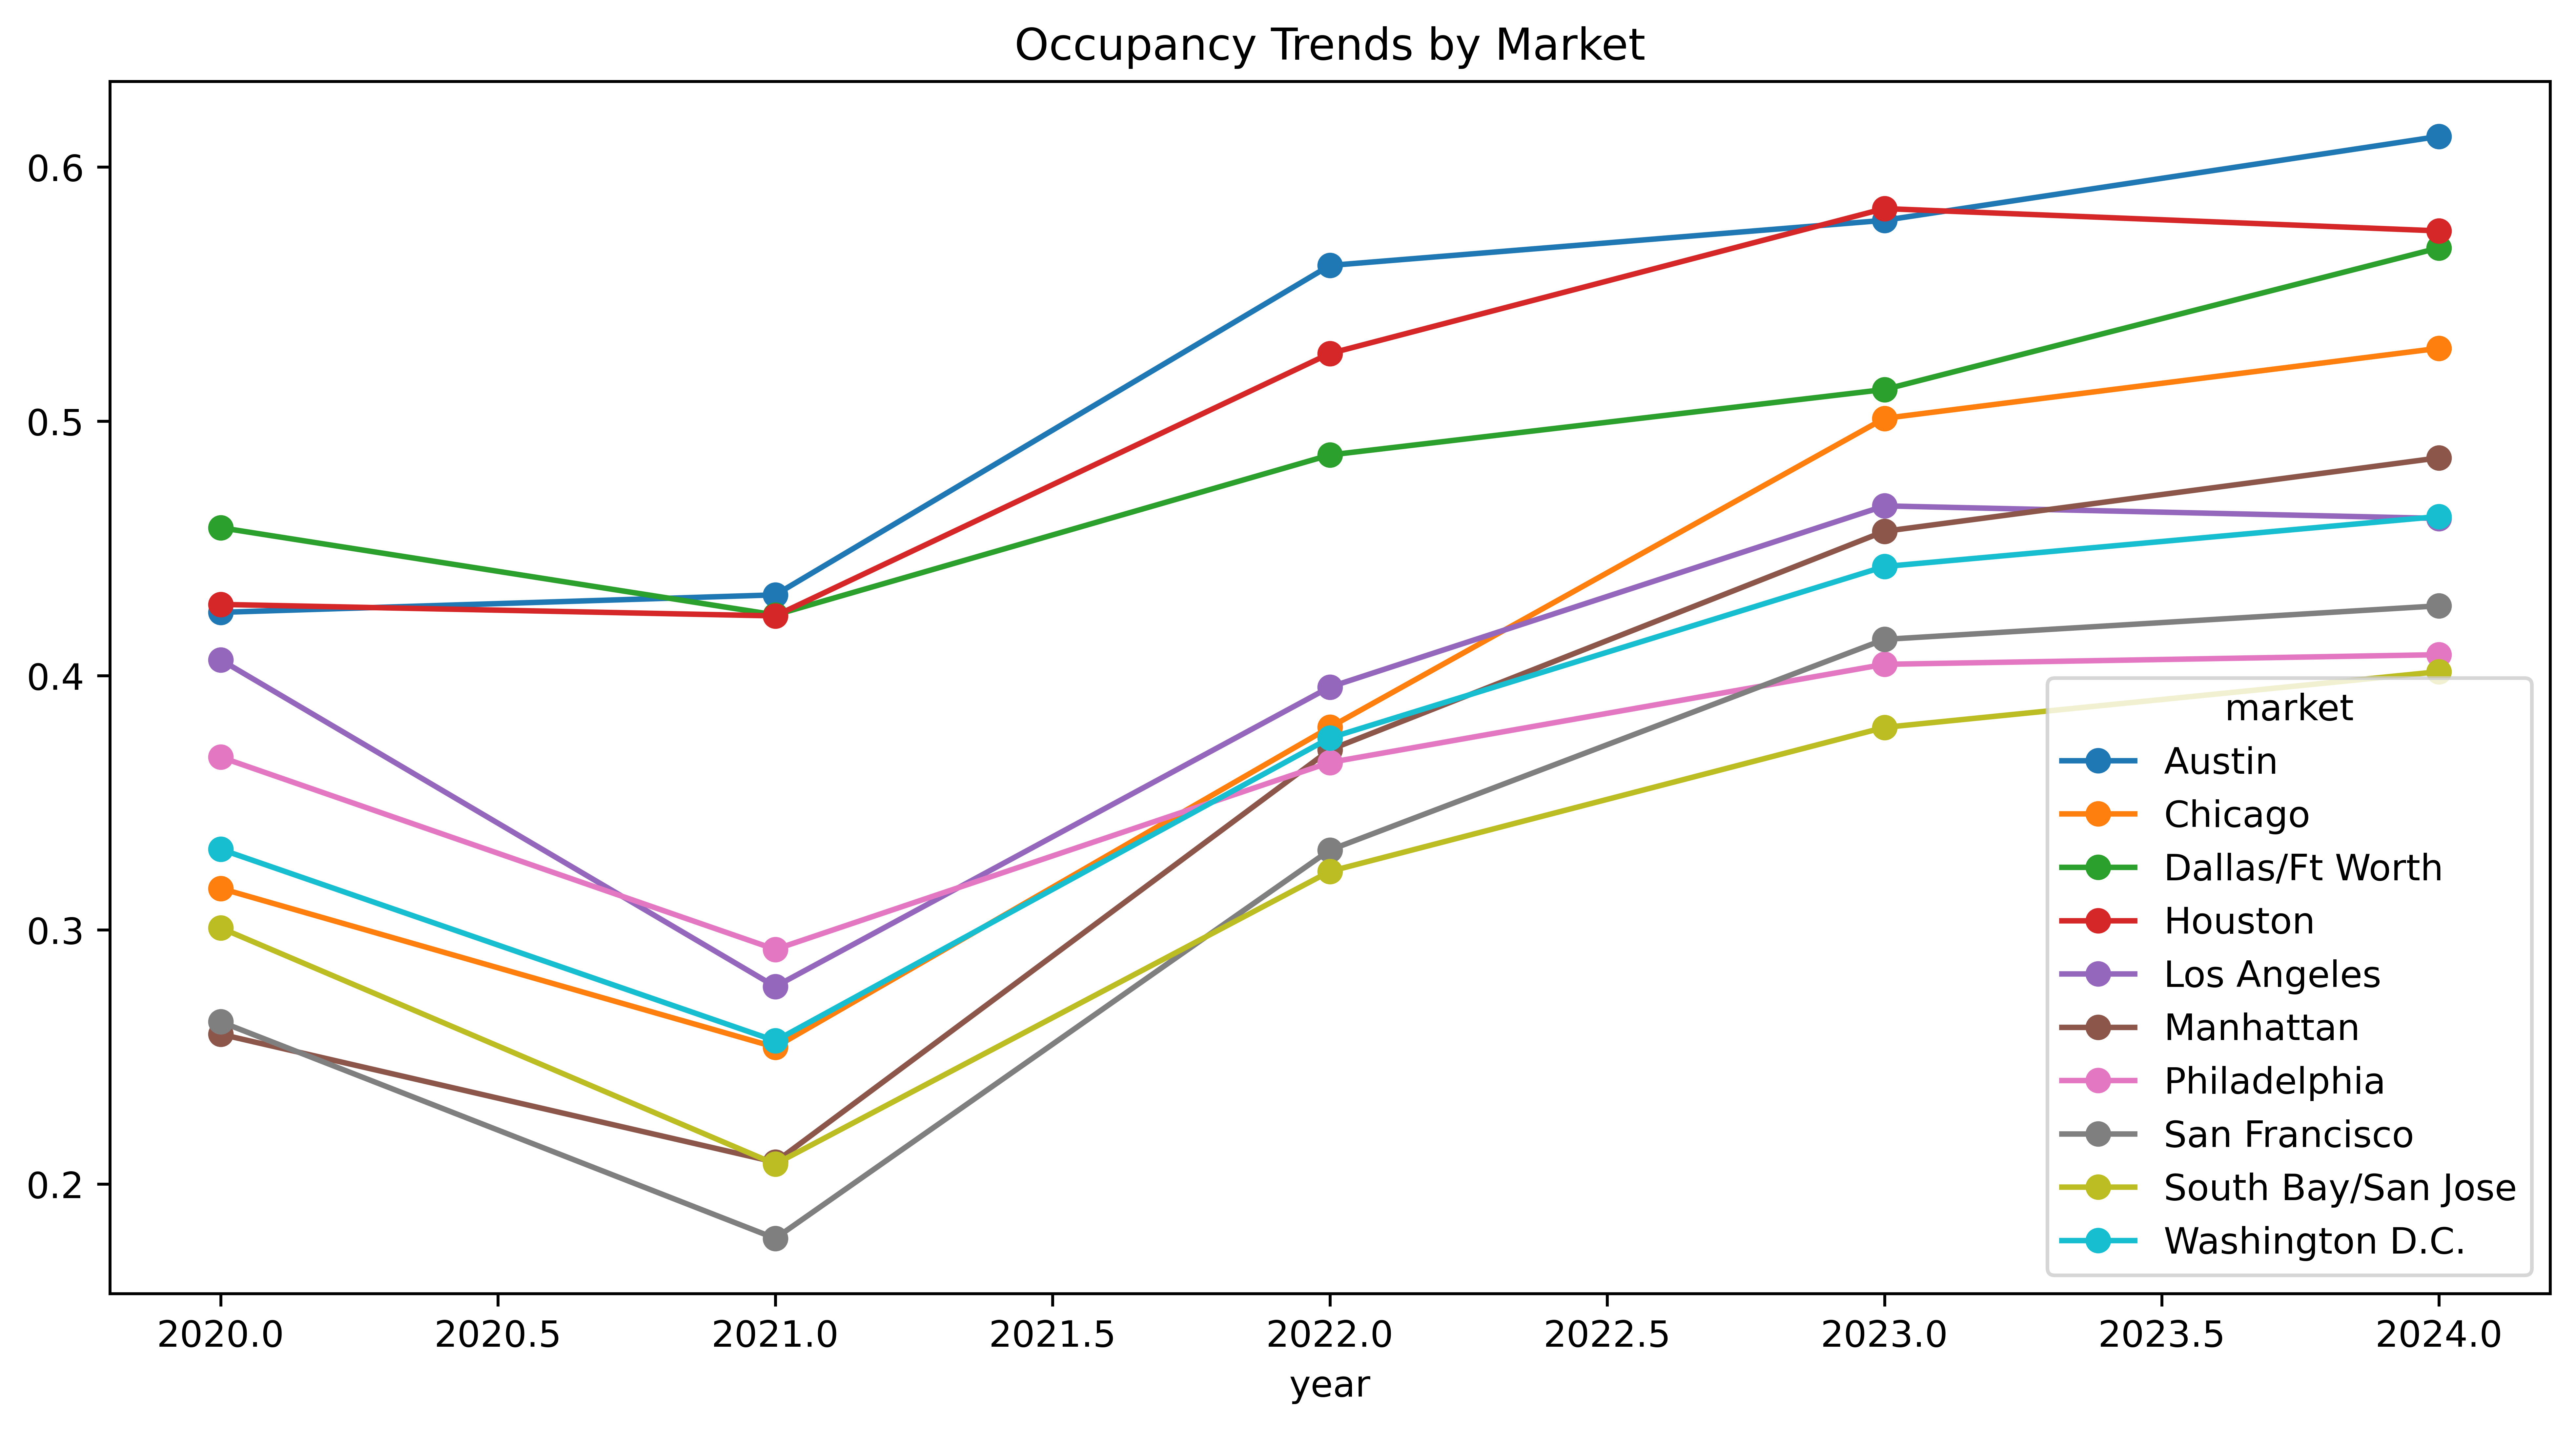

In [ ]:
# Compare occupancy by market
occupancy_pivot = market_occupancy_data.pivot_table(index="year", columns="market", values="avg_occupancy_proportion")
plt.rcParams['figure.dpi'] = 800
occupancy_pivot.plot(figsize=(12,6), marker="o", linestyle="-", title="Occupancy Trends by Market")
plt.show()

In [ ]:
# check duplicates
# Check for duplicate (year, market) combinations
duplicate_entries = market_occupancy_data.groupby(["year", "market"]).size().reset_index(name="count")

# Show only duplicates (count > 1)
print(duplicate_entries[duplicate_entries["count"] > 1])


    year              market  count
0   2020              Austin      4
1   2020             Chicago      4
2   2020     Dallas/Ft Worth      4
3   2020             Houston      4
4   2020         Los Angeles      4
5   2020           Manhattan      4
6   2020        Philadelphia      4
7   2020       San Francisco      4
8   2020  South Bay/San Jose      4
9   2020     Washington D.C.      4
10  2021              Austin      4
11  2021             Chicago      4
12  2021     Dallas/Ft Worth      4
13  2021             Houston      4
14  2021         Los Angeles      4
15  2021           Manhattan      4
16  2021        Philadelphia      4
17  2021       San Francisco      4
18  2021  South Bay/San Jose      4
19  2021     Washington D.C.      4
20  2022              Austin      4
21  2022             Chicago      4
22  2022     Dallas/Ft Worth      4
23  2022             Houston      4
24  2022         Los Angeles      4
25  2022           Manhattan      4
26  2022        Philadelphia

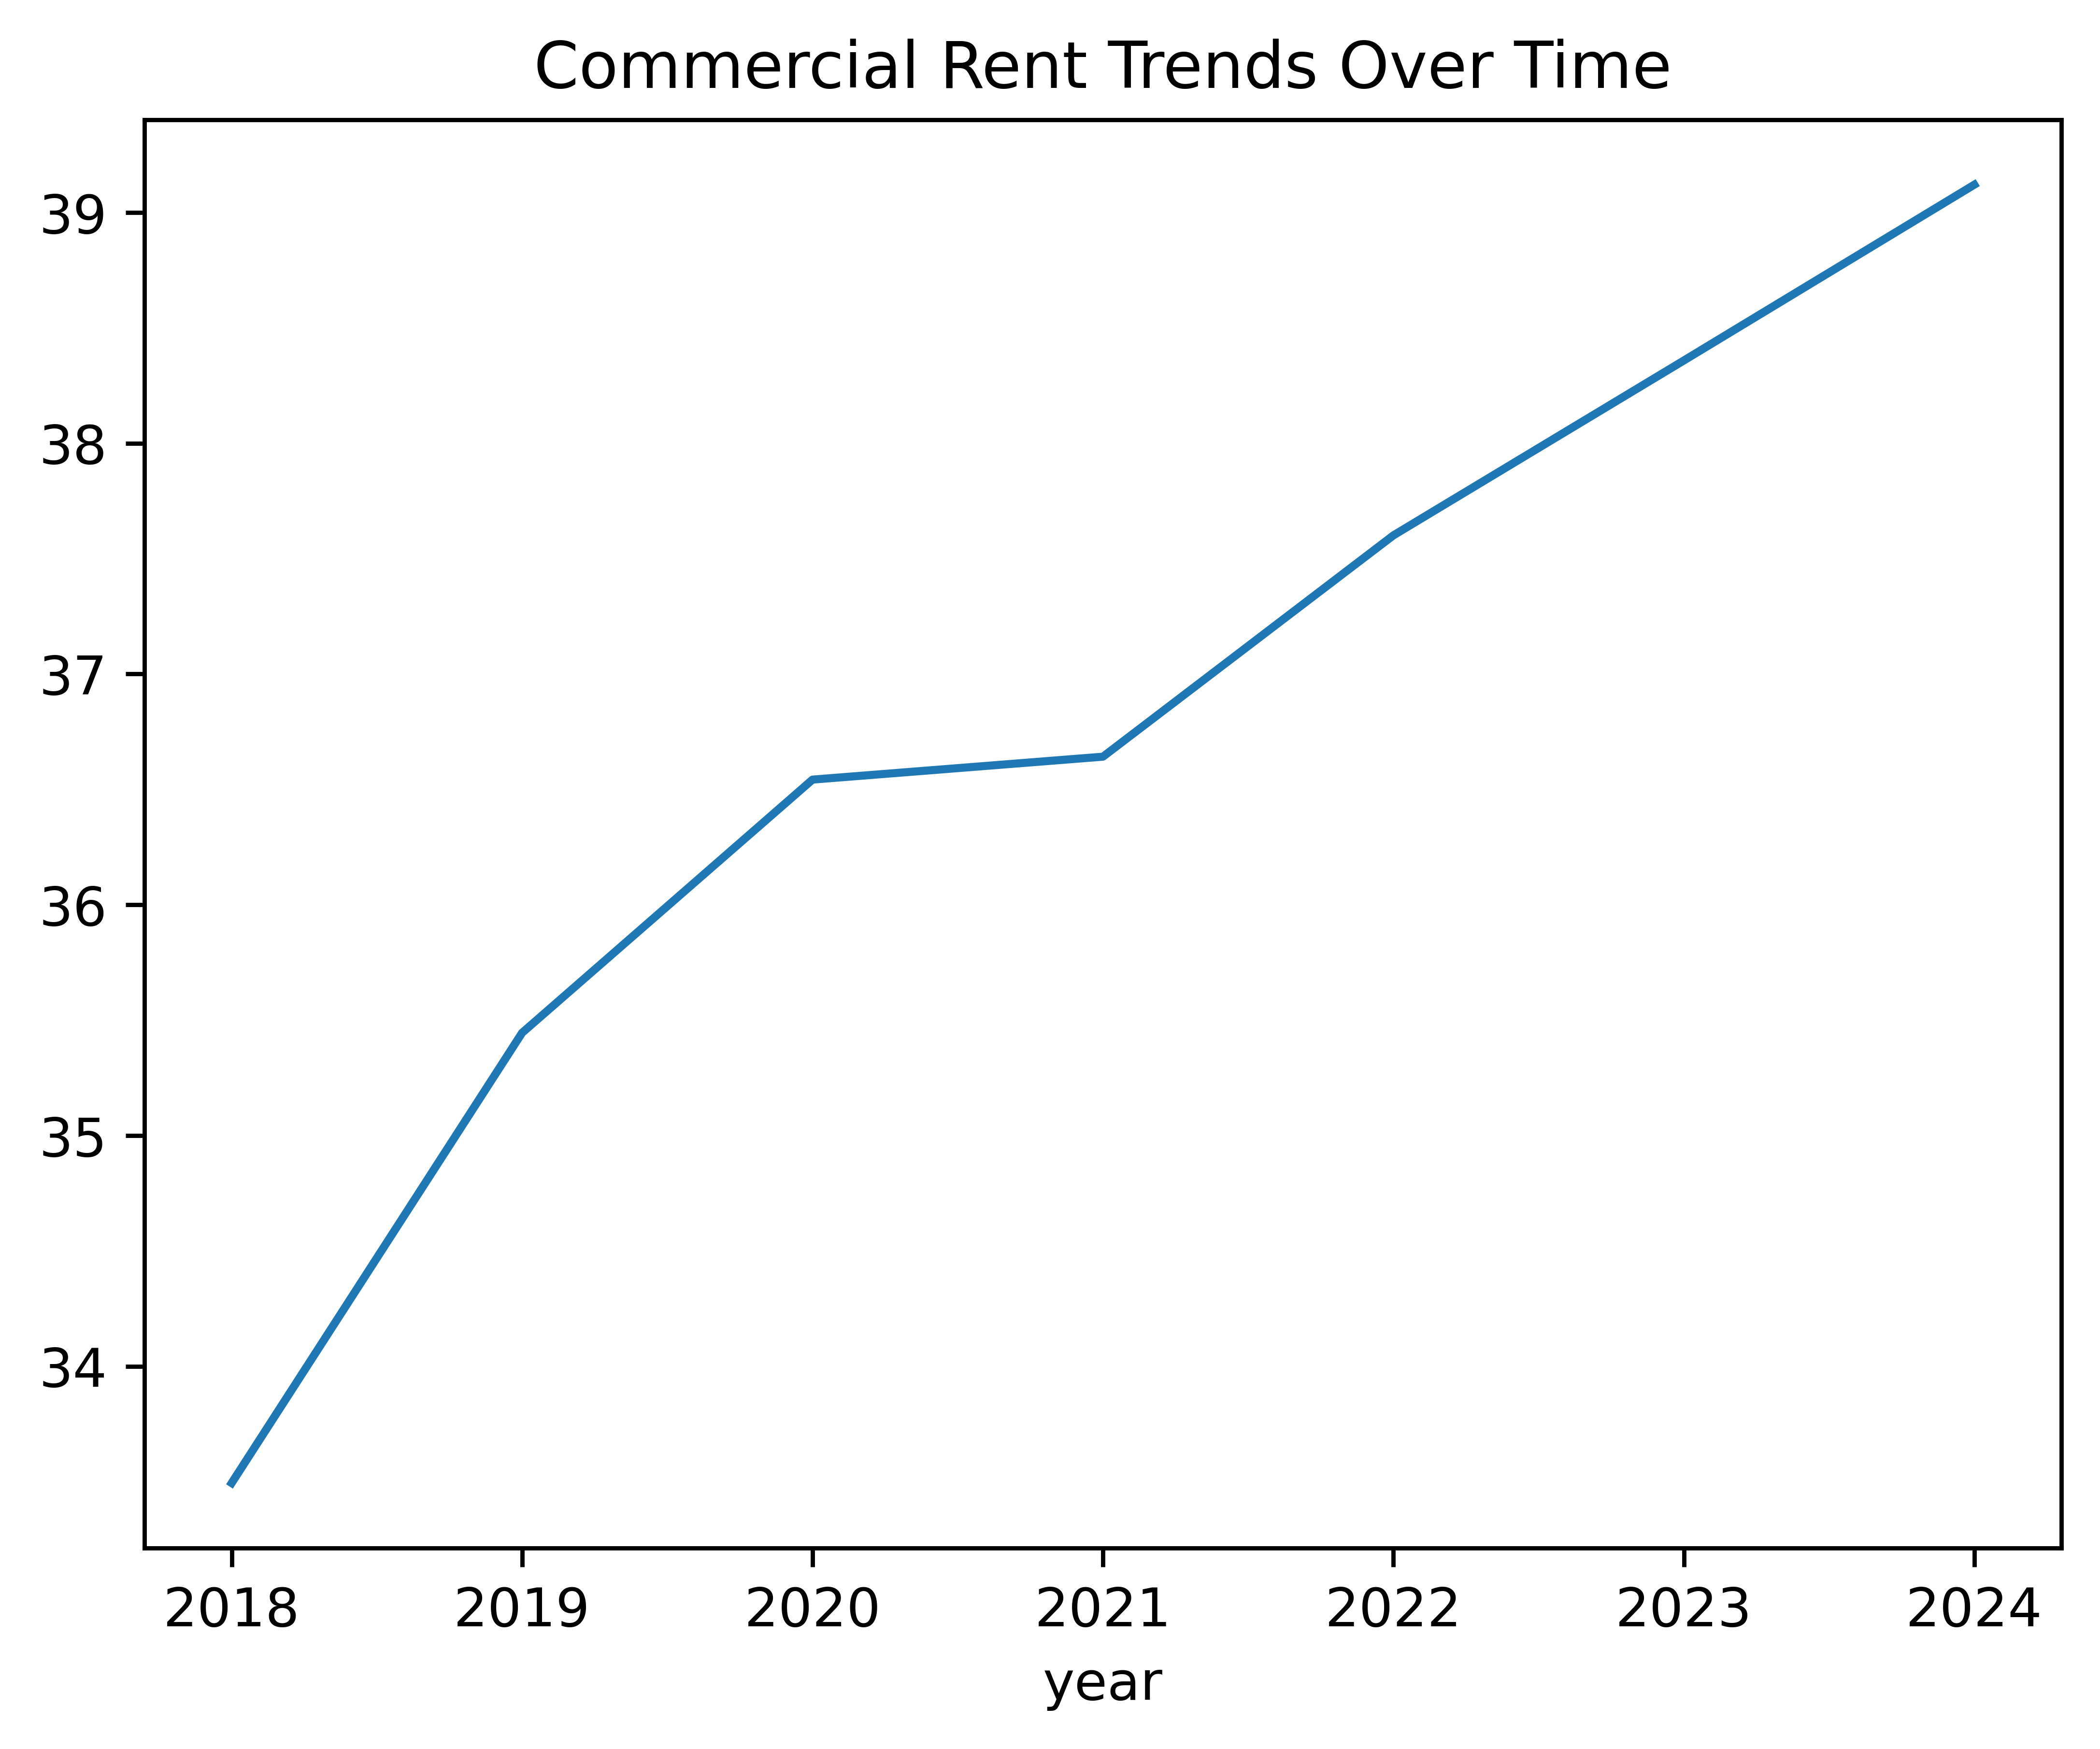

In [ ]:
# Rent trends over time
rent_trends = price_avail_data.groupby("year")["overall_rent"].mean()
plt.rcParams['figure.dpi'] = 800
rent_trends.plot(kind="line", title="Commercial Rent Trends Over Time")
plt.show()


<Axes: xlabel='available_space', ylabel='overall_rent'>

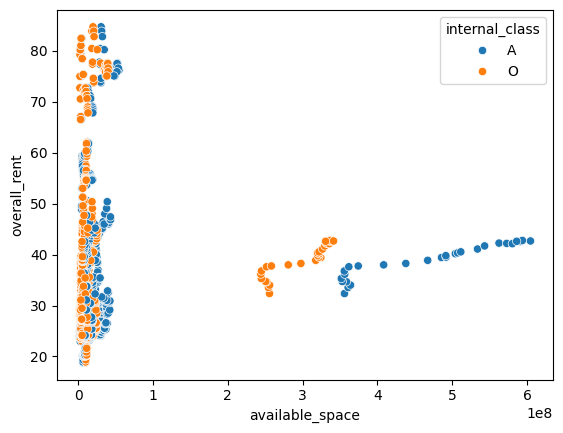

In [ ]:
# availability vs Rent
sns.scatterplot(data=price_avail_data, x="available_space", y="overall_rent", hue="internal_class")
# available space in square foot?


In [ ]:
# unemployment vs leasing trends
merged_data = leases_data.merge(unemployment_data, on=["year", "state"], how="left")
print(merged_data[["unemployment_rate", "leasedSF"]].corr())  # Check correlation


                   unemployment_rate  leasedSF
unemployment_rate           1.000000  0.008911
leasedSF                    0.008911  1.000000


Barely any relationship with unemployment rate and leased square footage.

<Axes: title={'center': 'Average Unemployment Rate Over Time'}, xlabel='year'>

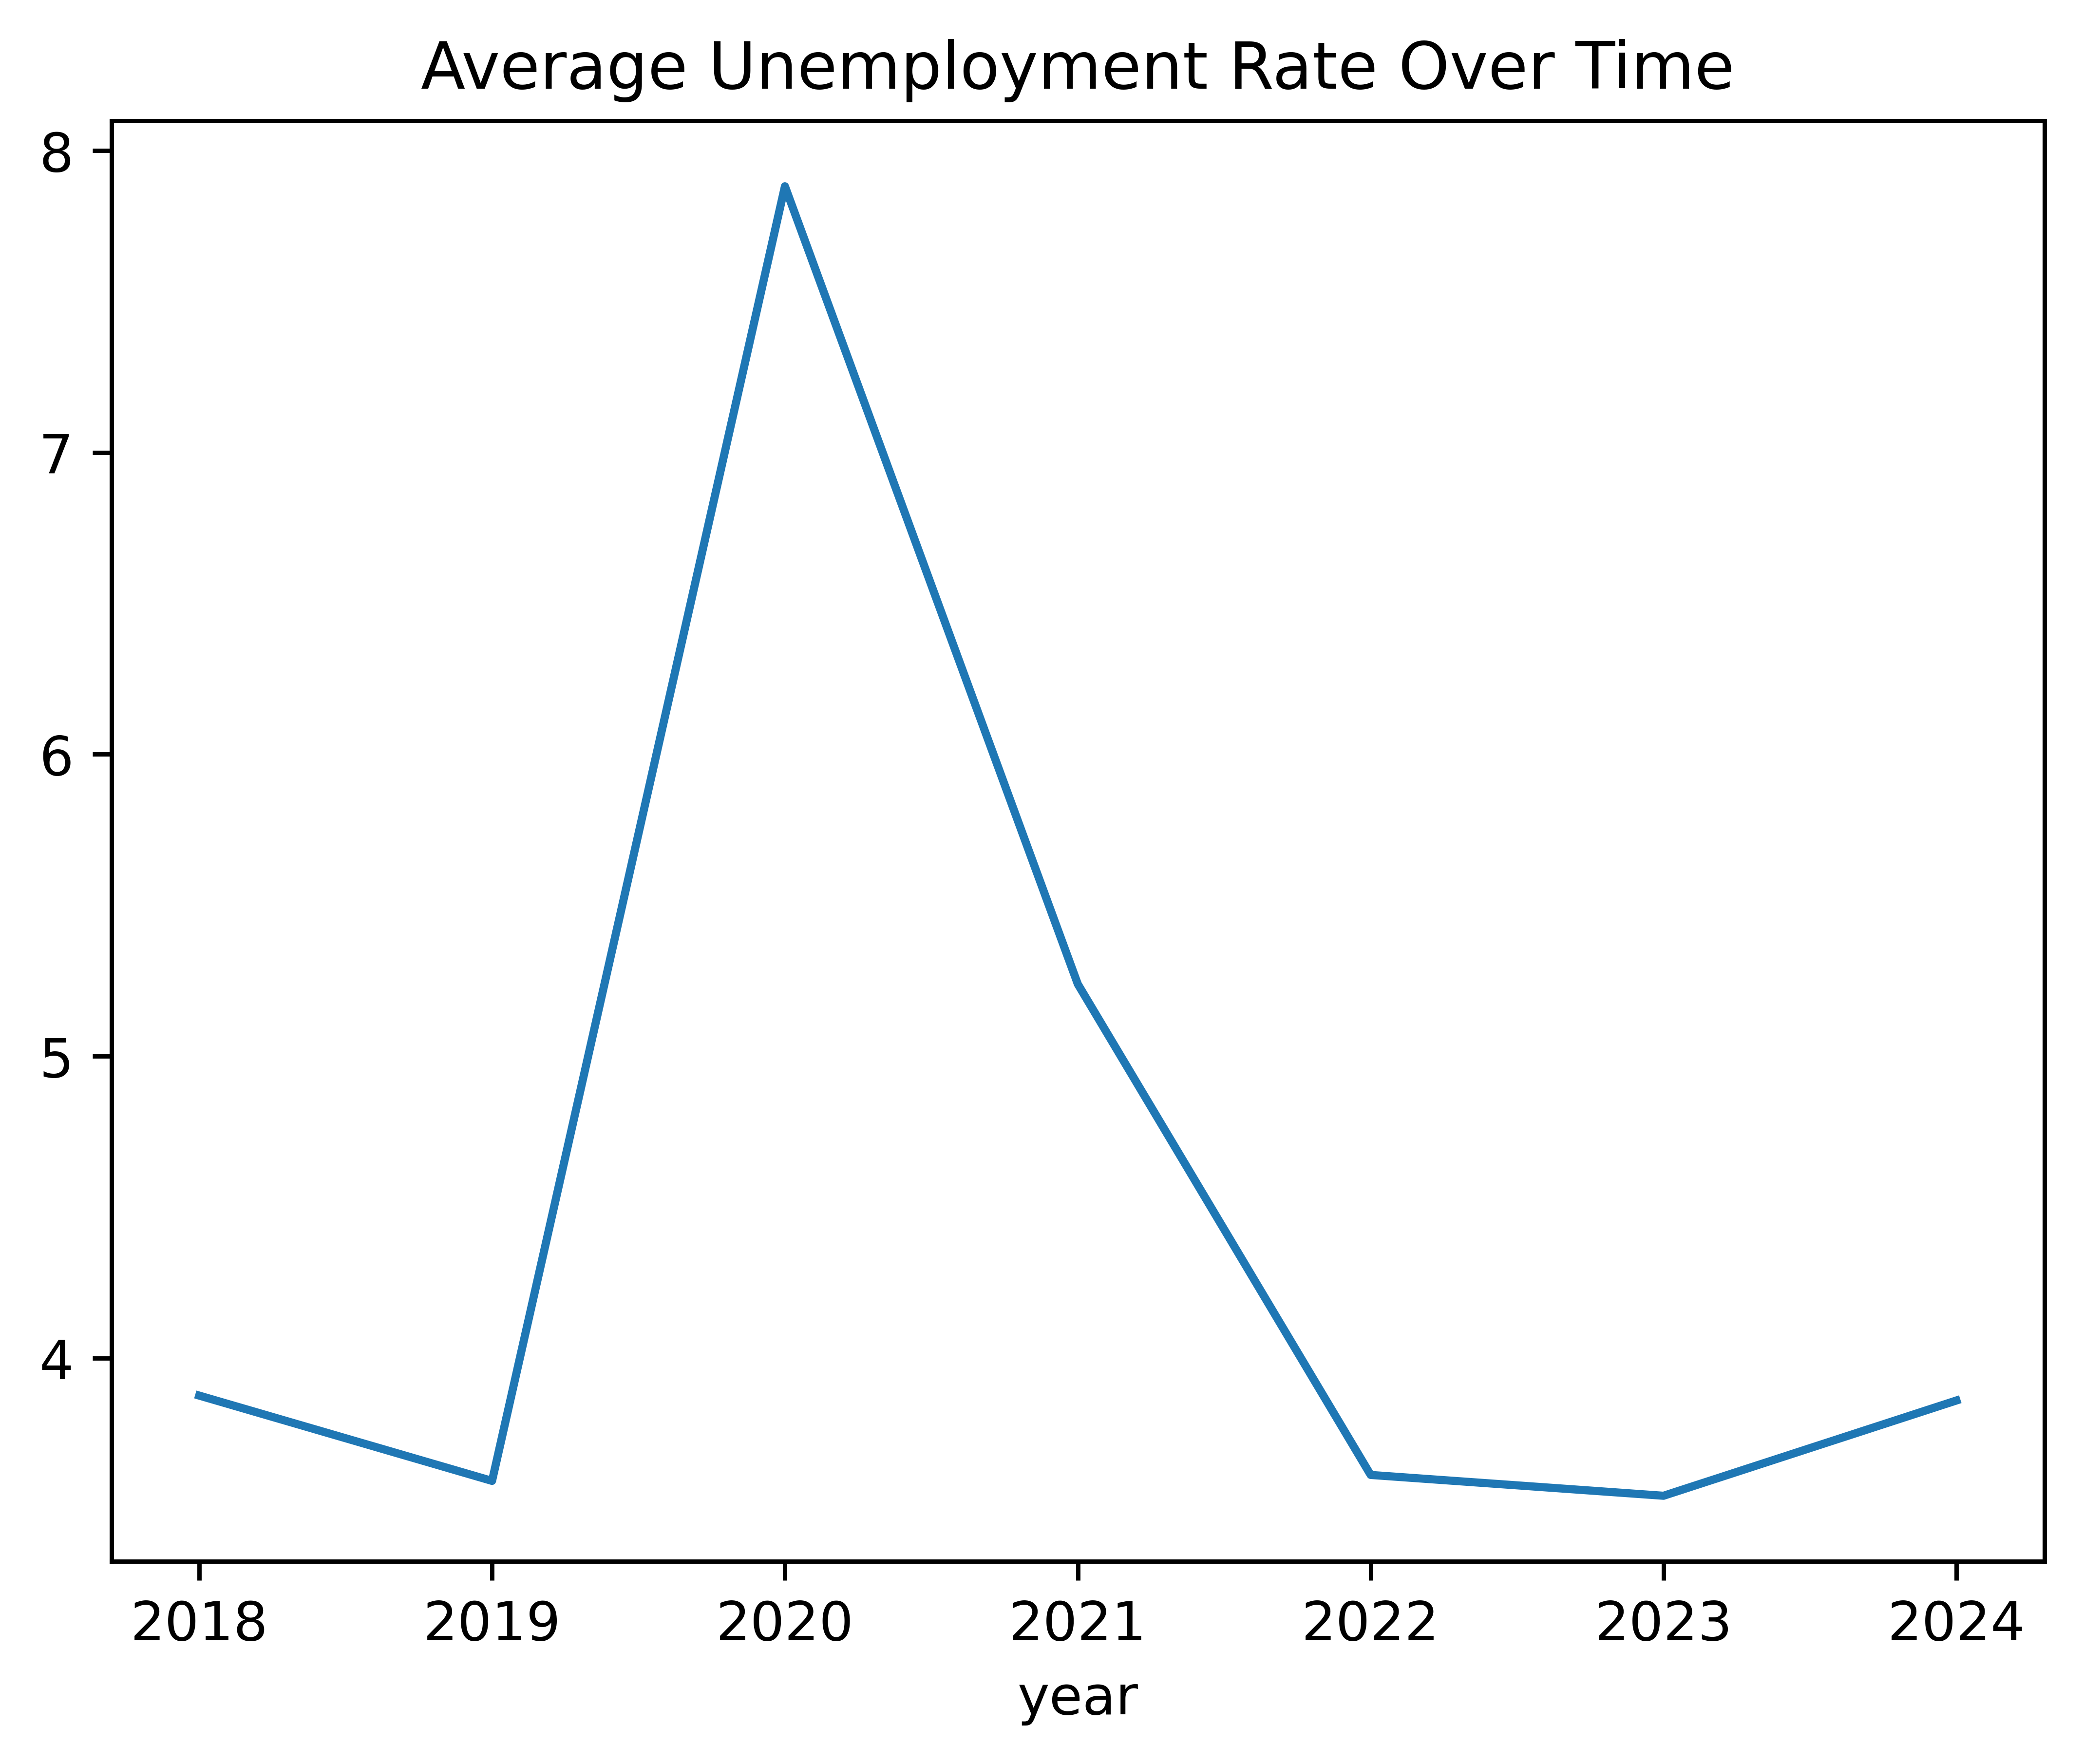

In [ ]:
# unemployment rate overtime
unemployment_trends = unemployment_data.groupby("year")["unemployment_rate"].mean()
unemployment_trends.plot(kind="line", title="Average Unemployment Rate Over Time")


In [ ]:
# Filter Leases to major markets only
# Filter Leases.csv (leases_data) by
# Step 1: Ensure we have the list of major markets from the Major Market Occupancy dataset
major_markets = market_occupancy_data['market'].dropna().unique()

# Step 2: Filter leases_data based on the given conditions
filtered_leases_data = leases_data[
    (leases_data["leasedSF"] >= 10000) &  # Leases must be ≥ 10,000 sqft
    (leases_data["company_name"].notna()) &  # Company name must not be NA
    (leases_data["market"].isin(major_markets))  # Market must be in Major Market Occupancy dataset
]

# Display filtered dataset info
# filtered_leases.info()

# Preview first few rows
filtered_leases_data.head()

print(major_markets)


['Washington D.C.' 'Manhattan' 'Chicago' 'Houston' 'Philadelphia'
 'San Francisco' 'Los Angeles' 'Dallas/Ft Worth' 'South Bay/San Jose'
 'Austin']


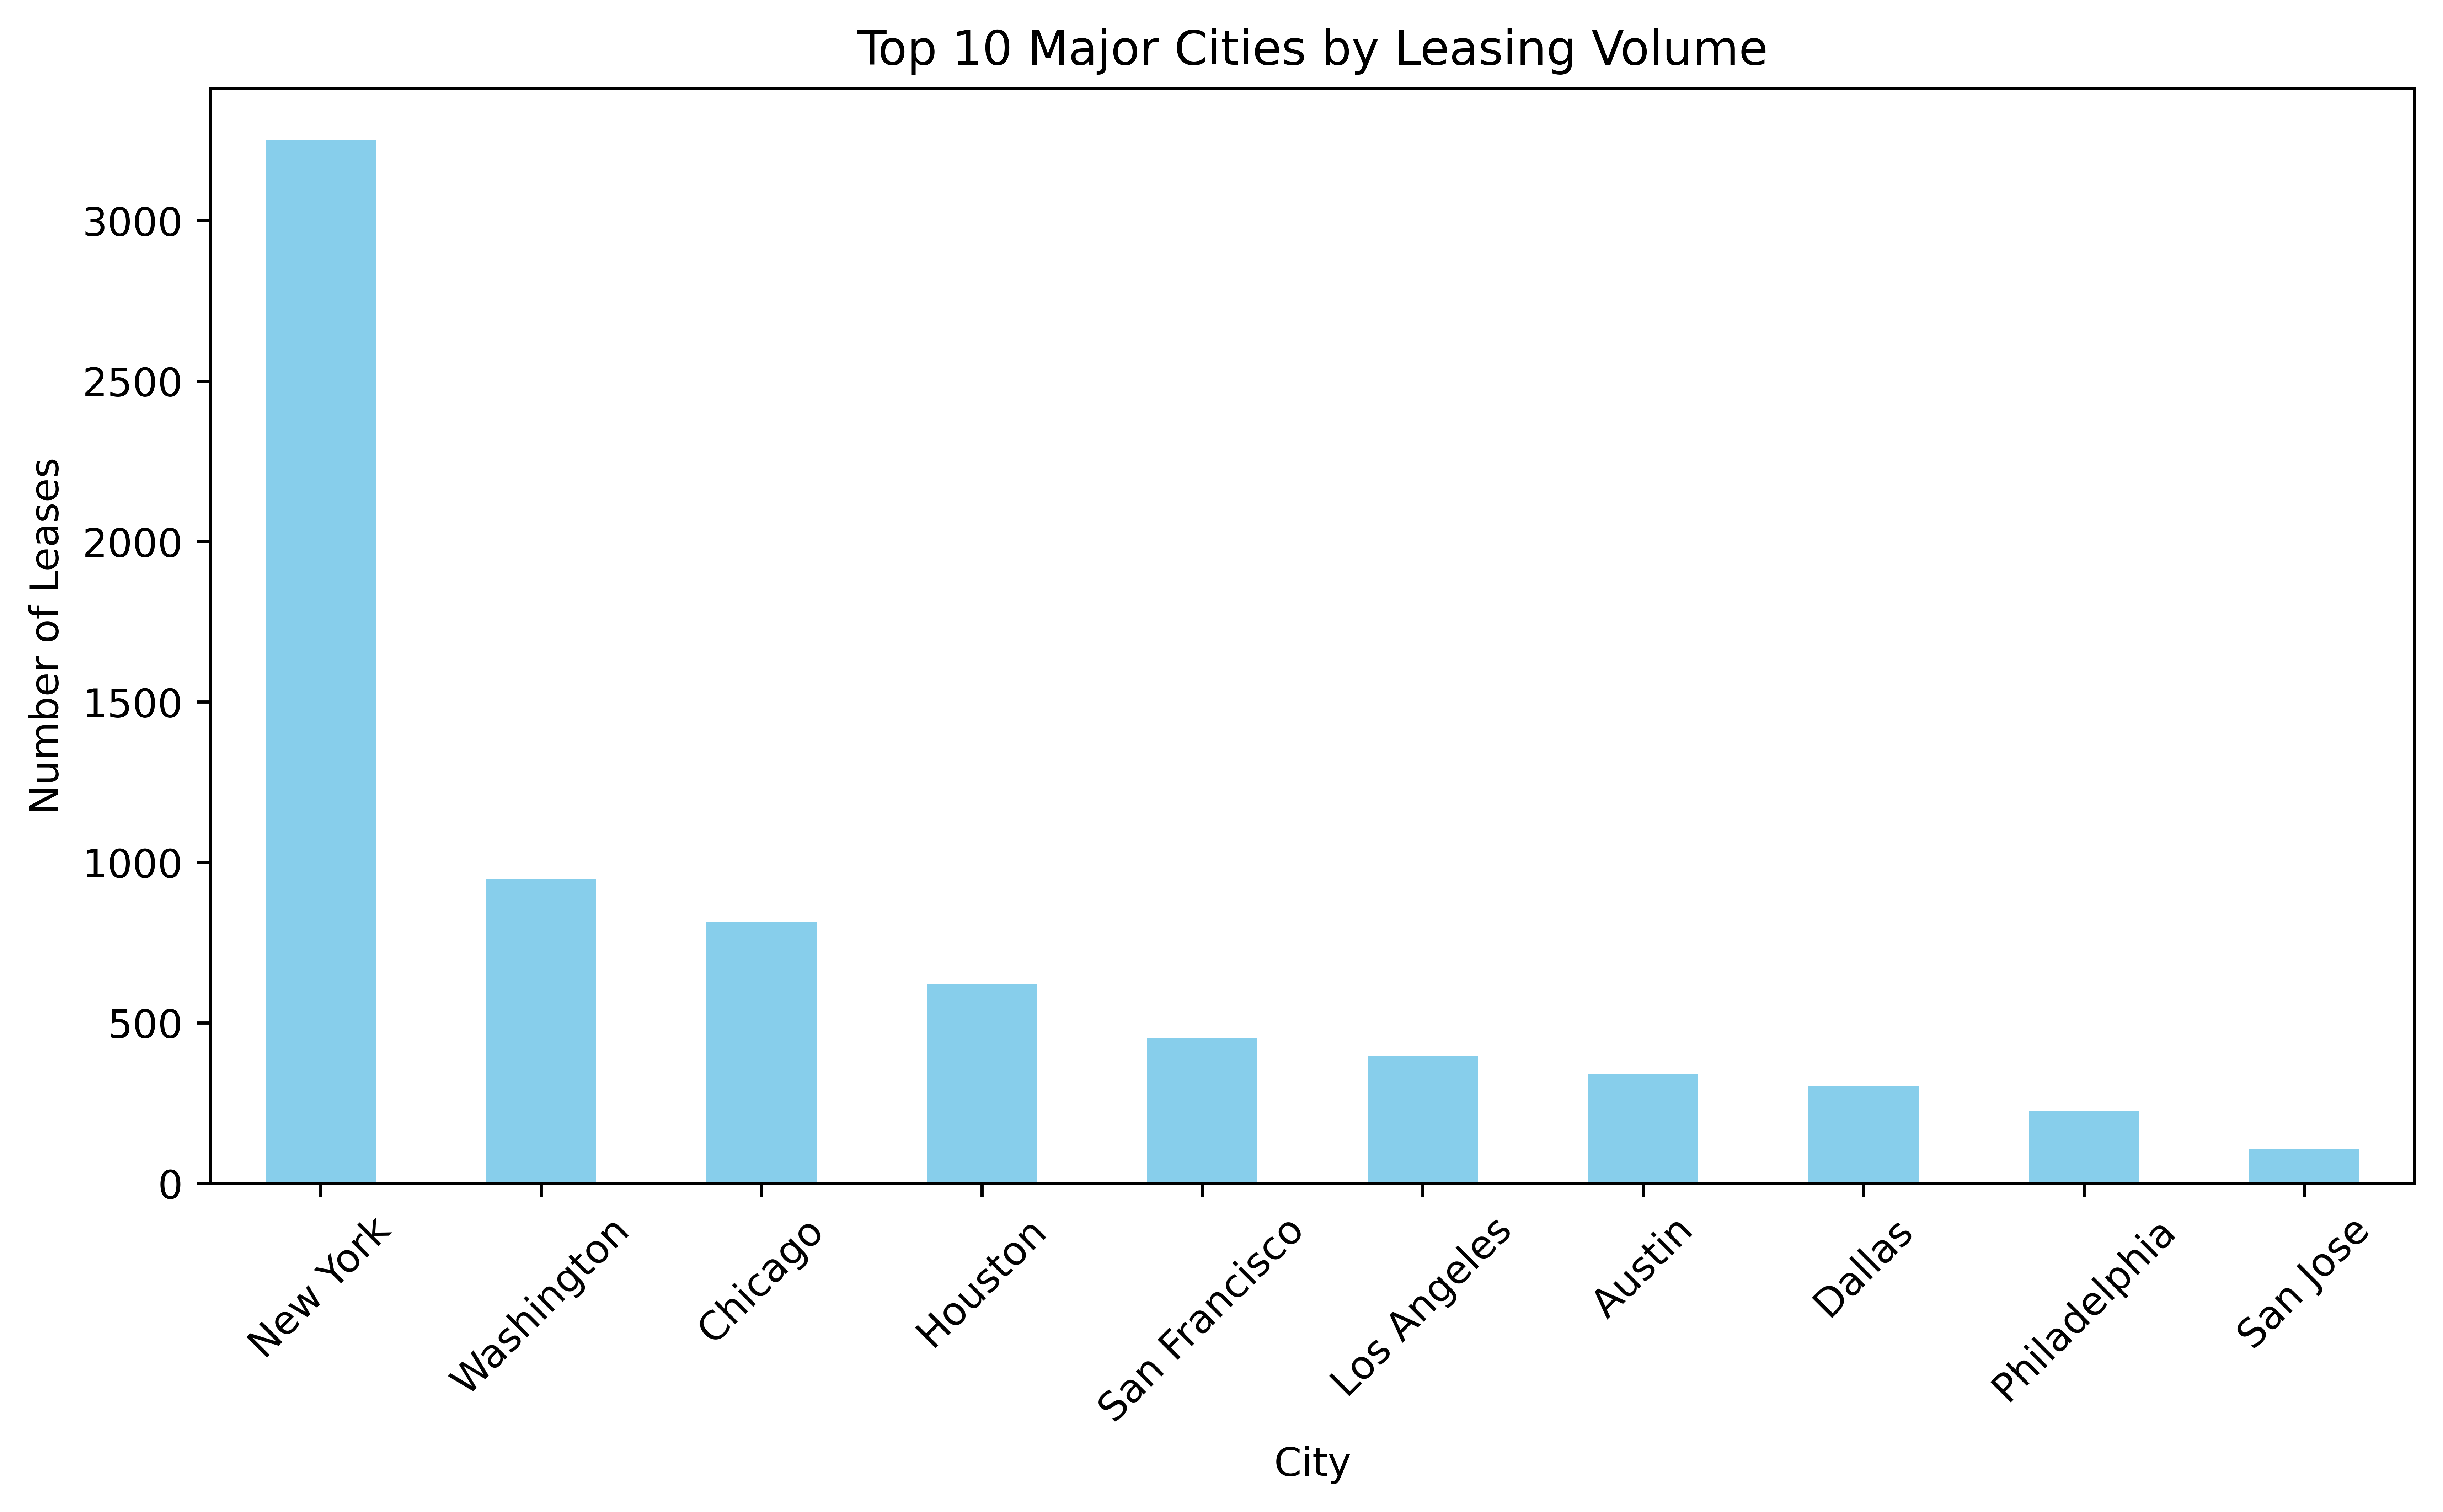

In [ ]:
# Cities by leasing volume

leases_per_city = filtered_leases_data["city"].value_counts().head(10)

plt.figure(figsize=(10,5))
leases_per_city.plot(kind="bar", color="skyblue")
plt.xlabel("City")
plt.ylabel("Number of Leases")
plt.title("Top 10 Major Cities by Leasing Volume")
plt.xticks(rotation=45)
plt.rcParams['figure.dpi'] = 800
plt.show()


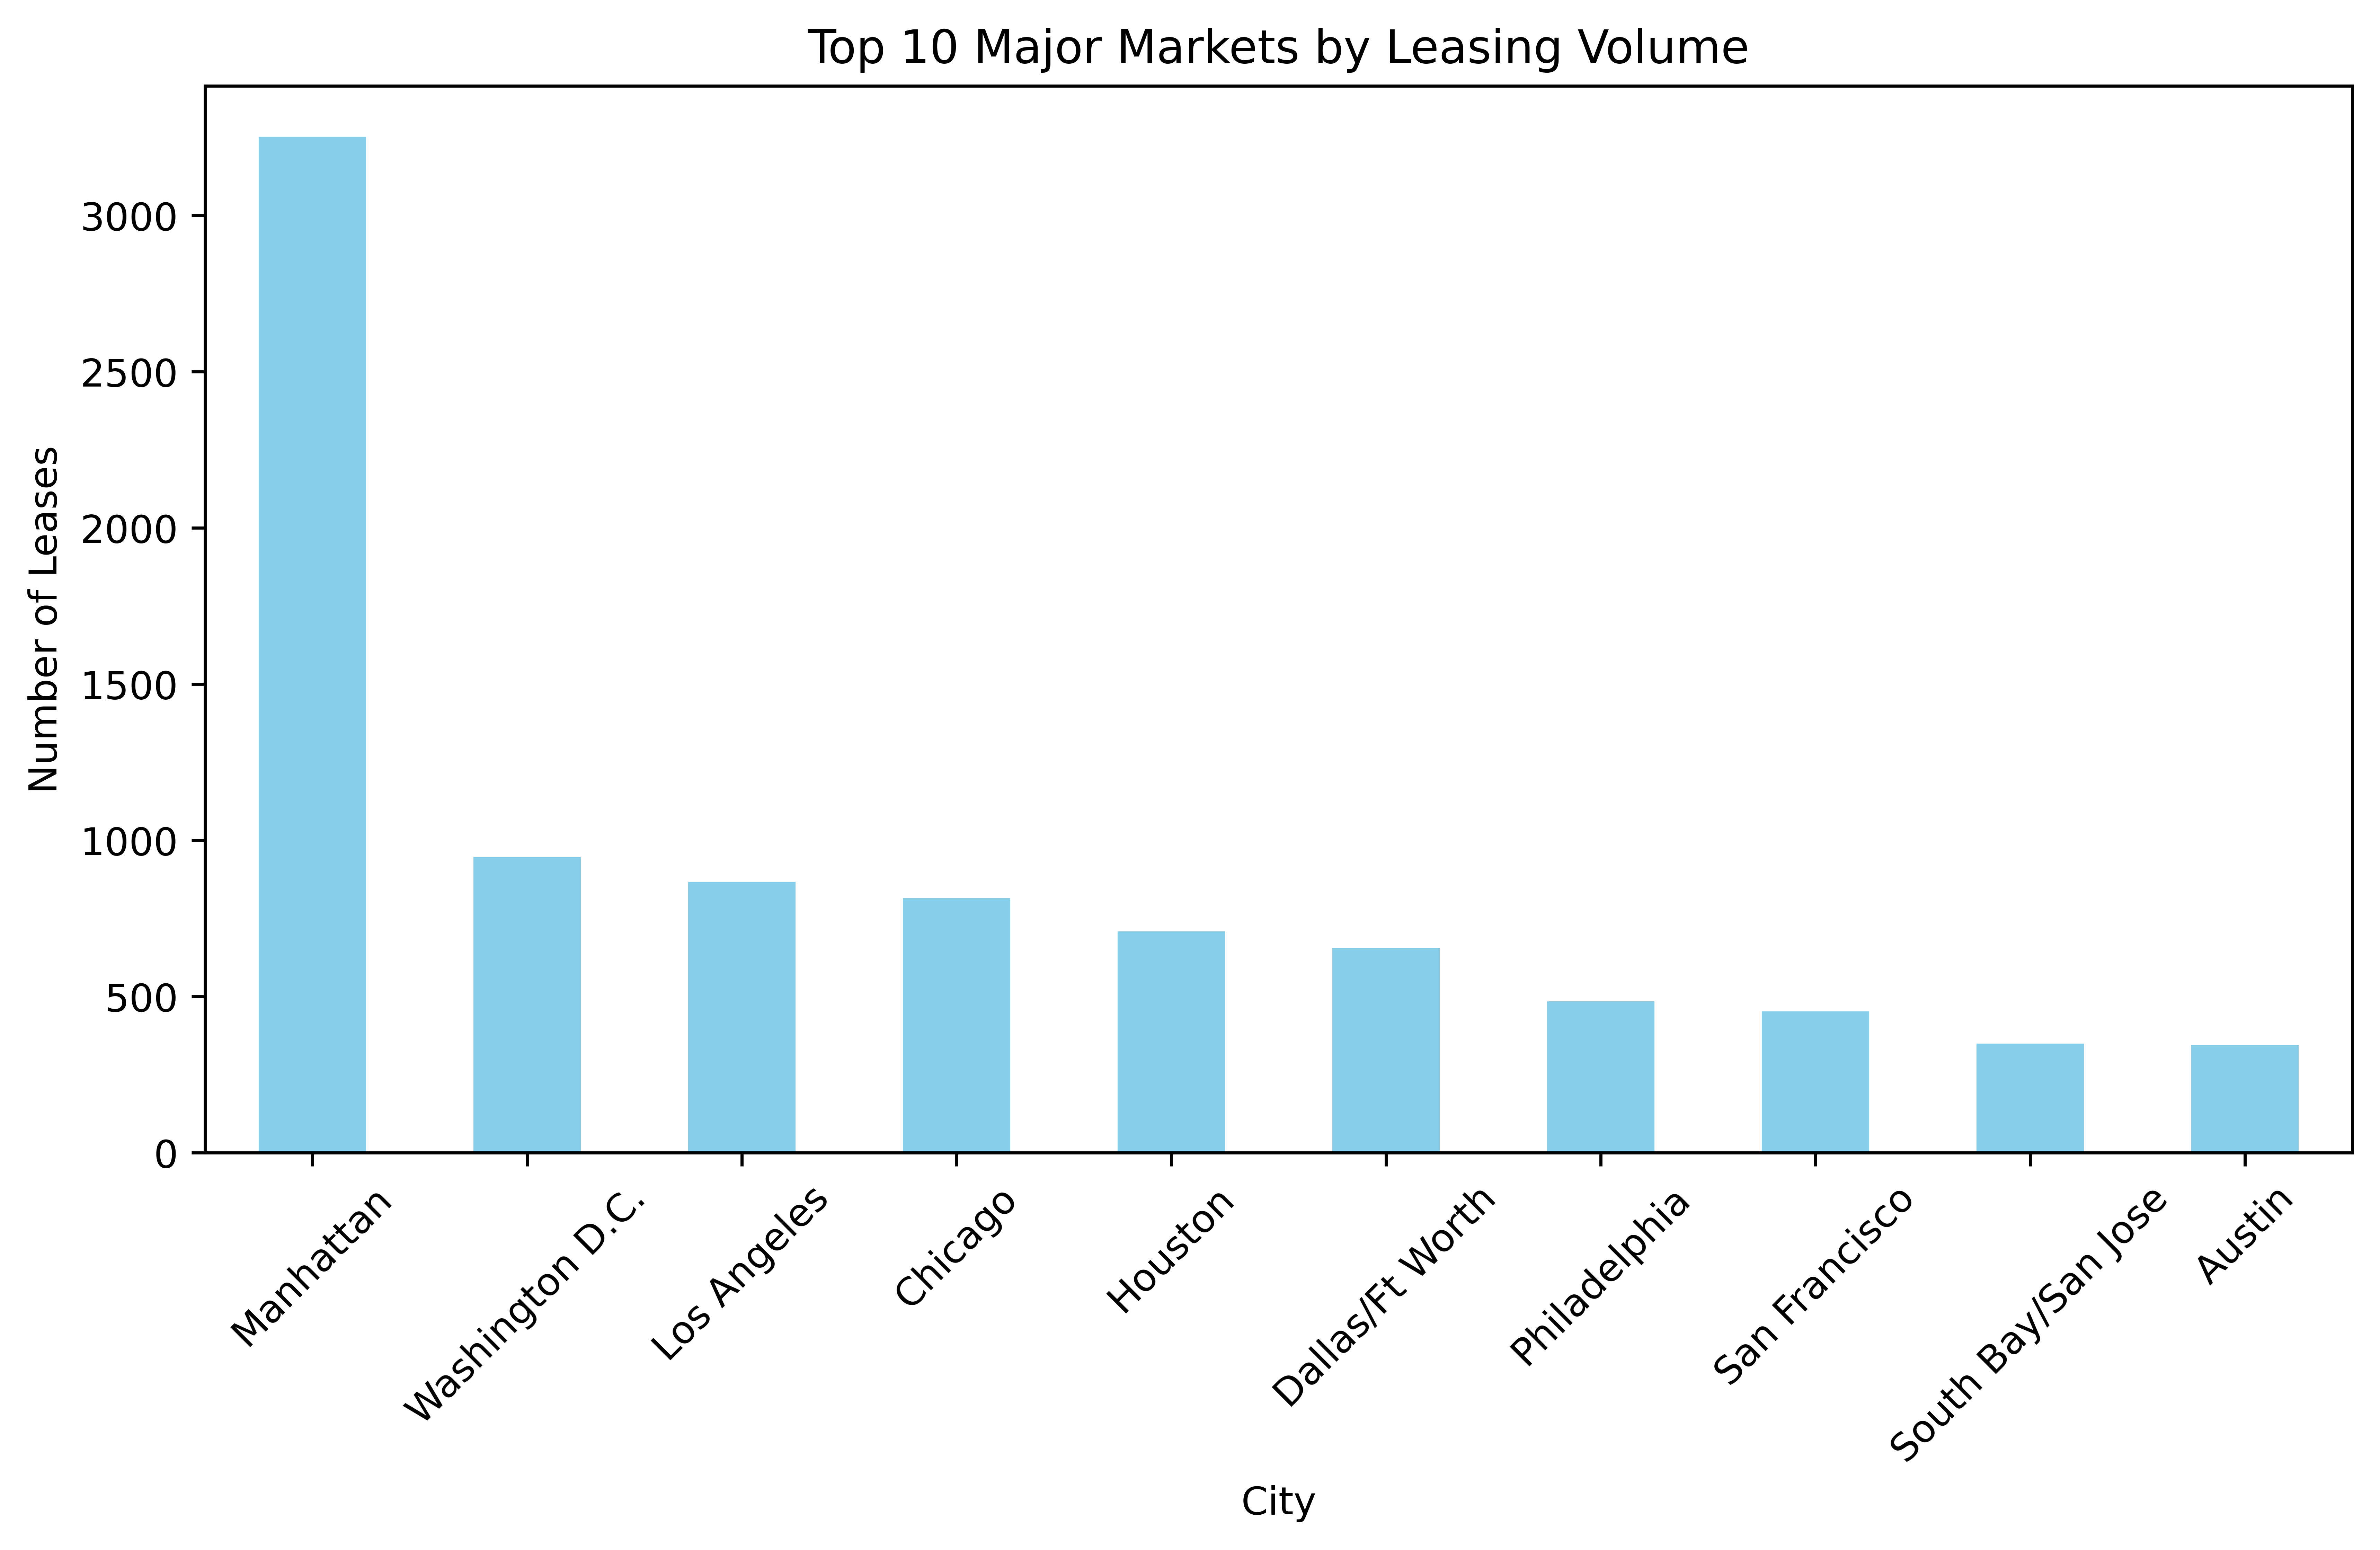

In [ ]:
# Major Markets by leasing volume

leases_per_city = filtered_leases_data["market"].value_counts().head(10)

plt.figure(figsize=(10,5))
leases_per_city.plot(kind="bar", color="skyblue")
plt.xlabel("City")
plt.ylabel("Number of Leases")
plt.title("Top 10 Major Markets by Leasing Volume")
plt.xticks(rotation=45)
plt.rcParams['figure.dpi'] = 800
plt.show()


In [ ]:
price_avail_data["internal_class_rent"].describe()


count    1680.000000
mean       35.878965
std        14.197553
min        16.957171
25%        26.342746
50%        31.618035
75%        41.165751
max        94.191224
Name: internal_class_rent, dtype: float64